## Analysis of Zomato Restaurants in Bangalore

####  With this analysis we will try to identify the best and the most famous restaurants in Bangalore. We will try to give insights to find the best places to open a restaurant.

##### Data Description: There is one .xlsx file in the dataset. (Zomato.xlsx) This file includes:
#### Name, Location, Dishes and various other aspects of the restuarant.

##### Import Pandas and Numpy

In [2]:
import pandas as pd
import numpy as np

##### Import Matplotlib and Seaborn

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read the file as dataframe df

In [4]:
df= pd.read_csv("zomato.csv",encoding='latin1')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Preprocessing
#### We will remove all the irrelevant data from the datasheet. We will also change the names of certain colums.


In [7]:
df.drop(['url','address','phone'],axis=1,inplace=True)
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [8]:
df.drop(['reviews_list','menu_item'],axis=1,inplace=True)
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [9]:
df.drop(['location'],axis=1,inplace=True)

In [10]:
df.columns=['Name','Online_Order','Book_table','Rate','Votes','Rest_type','Dish_liked','Cuisines','Avg_cost','Meal_type','City']

In [11]:
df

,Name,Online_Order,Book_table,Rate,Votes,Rest_type,Dish_liked,Cuisines,Avg_cost,Meal_type,City
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


#### We will remove the /5 from the rate column so that it becomes easy for analysis

In [12]:
df['Rate']=df['Rate'].apply(lambda x:str(x).split('/')[0])

In [13]:
df.isnull().sum()

Name                0
Online_Order        0
Book_table          0
Rate                0
Votes               0
Rest_type         227
Dish_liked      28078
Cuisines           45
Avg_cost          346
Meal_type           0
City                0
dtype: int64

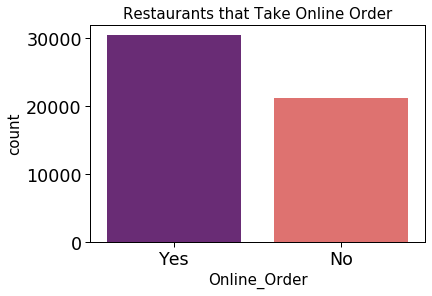

In [14]:
sns.set_context("paper", font_scale = 2, rc = {"font.size": 10,"axes.titlesize": 15,"axes.labelsize": 15})   
sns.countplot(x='Online_Order',data=df,palette='magma')
plt.title('Restaurants that Take Online Order')
plt.show()

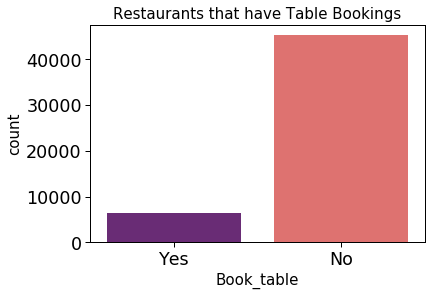

In [15]:
sns.set_context("paper", font_scale = 2, rc = {"font.size": 10,"axes.titlesize": 15,"axes.labelsize": 15})   
sns.countplot(x='Book_table',data=df,palette='magma')
plt.title('Restaurants that have Table Bookings')
plt.show()

##### Analysis: Most Restaurants have the option of online order and Table bookings

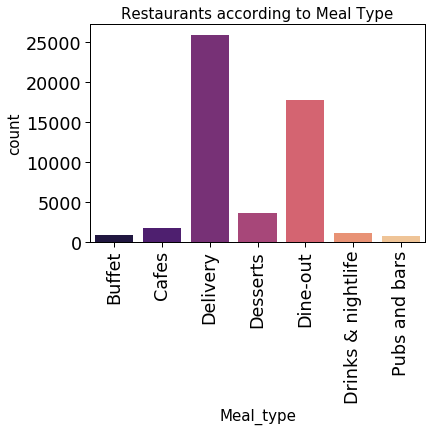

In [16]:
sns.set_context('paper',font_scale=2,rc={'font.size':10,'axes.labelsize':15,'axes.titlesize':15})
b=sns.countplot(x='Meal_type',data=df,palette='magma')
plt.title('Restaurants according to Meal Type')
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show()

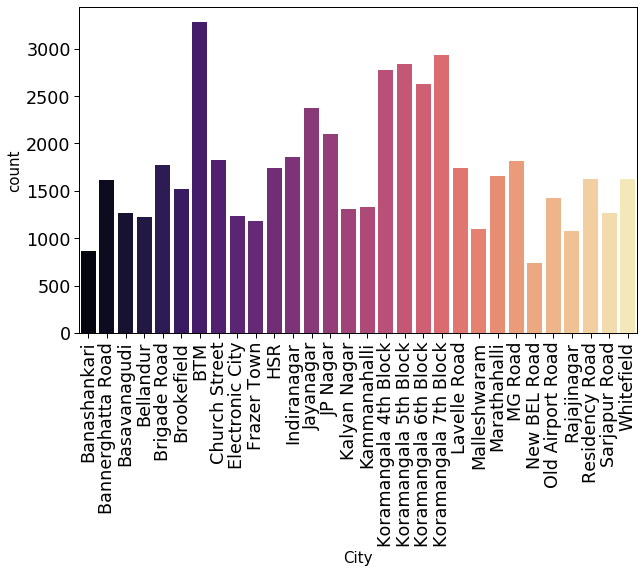

In [17]:
plt.figure(figsize=(10,6))
b=sns.countplot(x='City',data=df,palette='magma')
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show()

#### Analysis: BTM and Koramangala have the highest number of Restaurants in the city.

### Analysing the Rate Column

In [18]:
a=list(df['Rate'])
for i in range(len(a)):
    if a[i]=='-':
        a[i]=None
    elif a[i]=='NEW':
        a[i]=None
    elif a[i]=='nan':
        a[i]=None
    elif a[i]=='unrated':
        a[i]=None
    else:
        a[i]=float(a[i])

In [19]:
df['Rate']=a

In [20]:
df['Rate'].value_counts().head(10)

3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
Name: Rate, dtype: int64

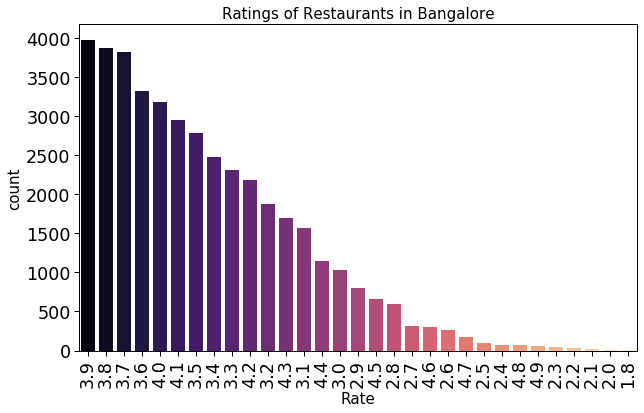

In [21]:
sns.set_context('paper',font_scale=2,rc={'font.size':15,'axes.titlesize':15,'axes.labelsize':15})
plt.figure(figsize=(10,6))
b=sns.countplot(x='Rate',data=df,palette='magma',order=df['Rate'].value_counts().index)
plt.title('Ratings of Restaurants in Bangalore')
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show()

#### Analysis: We can see that most of the restaurants have a rating from 3.5-4.0. Very less restaurants have an extremely bad rating or an extremely high rating.

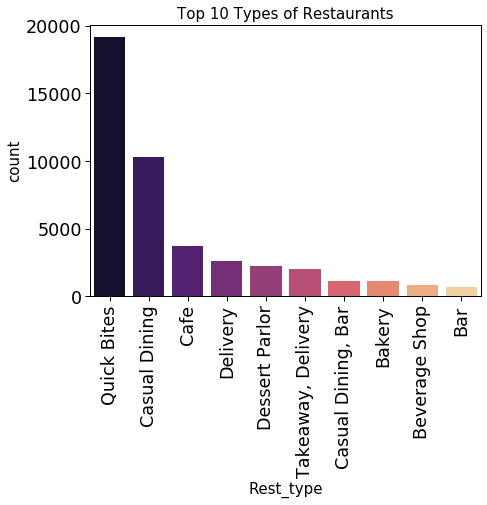

In [22]:
plt.figure(figsize=(7,5))
sns.set_context('paper',font_scale=2,rc={'font.size':10 ,'axes.titlesize':15,'axes.labelsize':15})
plt.title('Top 10 Types of Restaurants')
b=sns.countplot(x='Rest_type',data=df,palette='magma',order=df['Rest_type'].value_counts().head(10).index)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show()


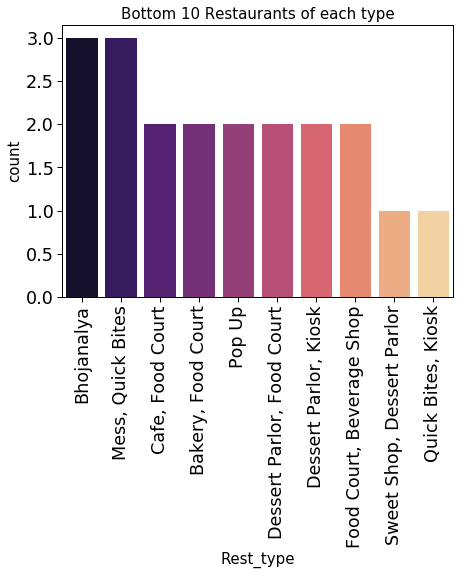

In [24]:
plt.figure(figsize=(7,5))
sns.set_context('paper',font_scale=2,rc={'font.size':10 ,'axes.titlesize':15,'axes.labelsize':15})
plt.title('Bottom 10 Restaurants of each type')
b=sns.countplot(x='Rest_type',data=df,palette='magma',order=df['Rest_type'].value_counts().tail(10).index)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show()


#### Analysis: We see that Quick Bites and Cafes are the most common types of restaurants.


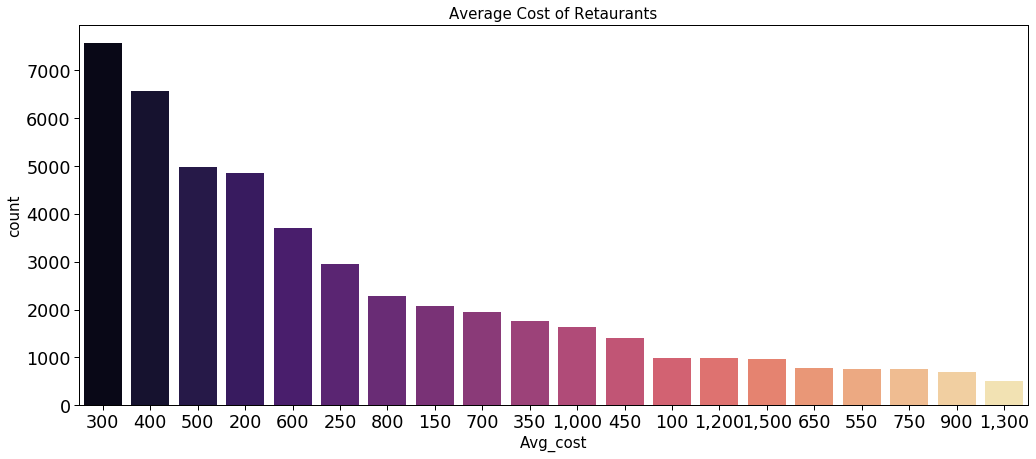

In [23]:
plt.figure(figsize=(17,7))
sns.set_context('paper',font_scale=2,rc={'font.size':10 ,'axes.titlesize':15,'axes.labelsize':15})
b=sns.countplot(x='Avg_cost',data=df,palette='magma',order=df['Avg_cost'].value_counts().head(20).index)
plt.title('Average Cost of Retaurants')
plt.show()

#### Average Cost of most Restaurants range betwwen 300 and 500. Hence showing that Bangalore has a lot of restaurants for a middle class family.

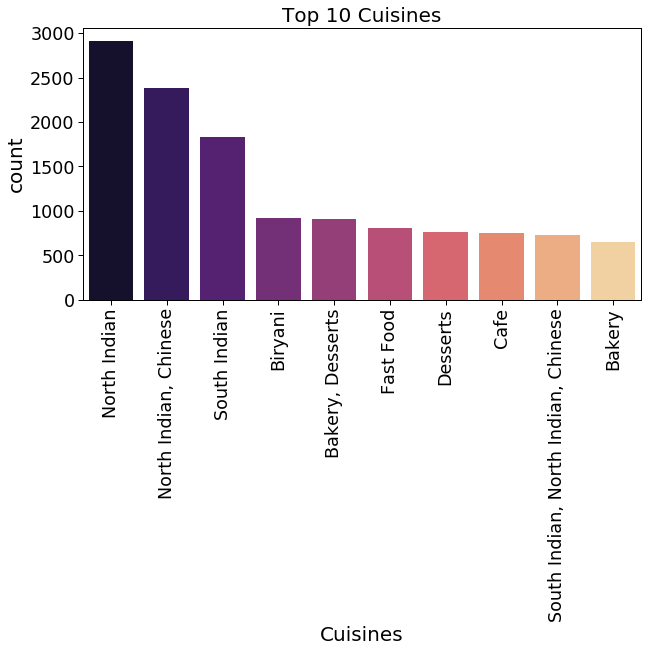

In [24]:
plt.figure(figsize=(10,5))
sns.set_context('paper',font_scale=2,rc={'font.size':20,'axes.titlesize':20,'axes.labelsize':20})
plt.title('Top 10 Cuisines')
b=sns.countplot(x='Cuisines',data=df,palette='magma',order=df['Cuisines'].value_counts().head(10).index)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show()

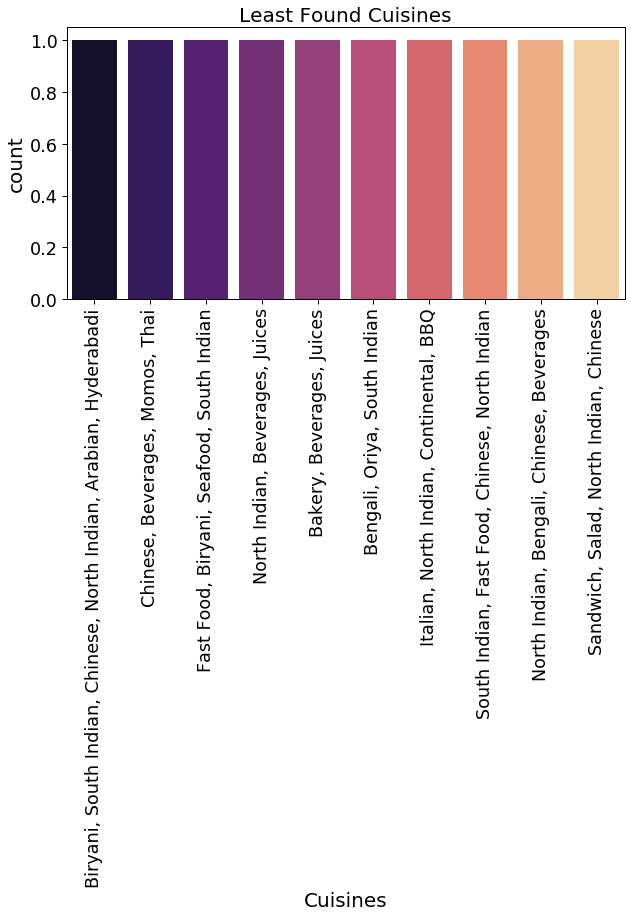

In [25]:
plt.figure(figsize=(10,5))
b=sns.countplot(x='Cuisines',data=df,palette='magma',order=df['Cuisines'].value_counts().tail(10).index)
sns.set_context('paper',font_scale=2,rc={'font.size':20,'axes.titlesize':20,'axes.labelsize':20})
plt.title('Least Found Cuisines')
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show()

#### The graphs above show that Indian origin food are the most famous type of food for people in Bangalore.

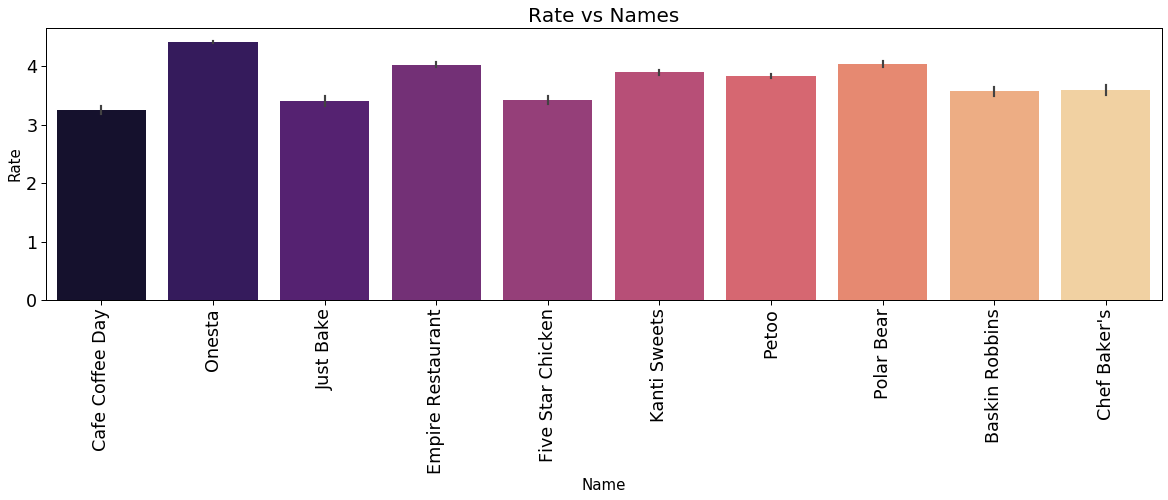

In [25]:
plt.figure(figsize=(20,5))
b=sns.barplot(x="Name",y='Rate',data=df,palette='magma',order=df['Name'].value_counts().head(10).index)
sns.set_context('paper',font_scale=2,rc={'font.size':20,'axes.titlesize':20,'axes.labelsize':20})
plt.title("Rate vs Names")
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show()

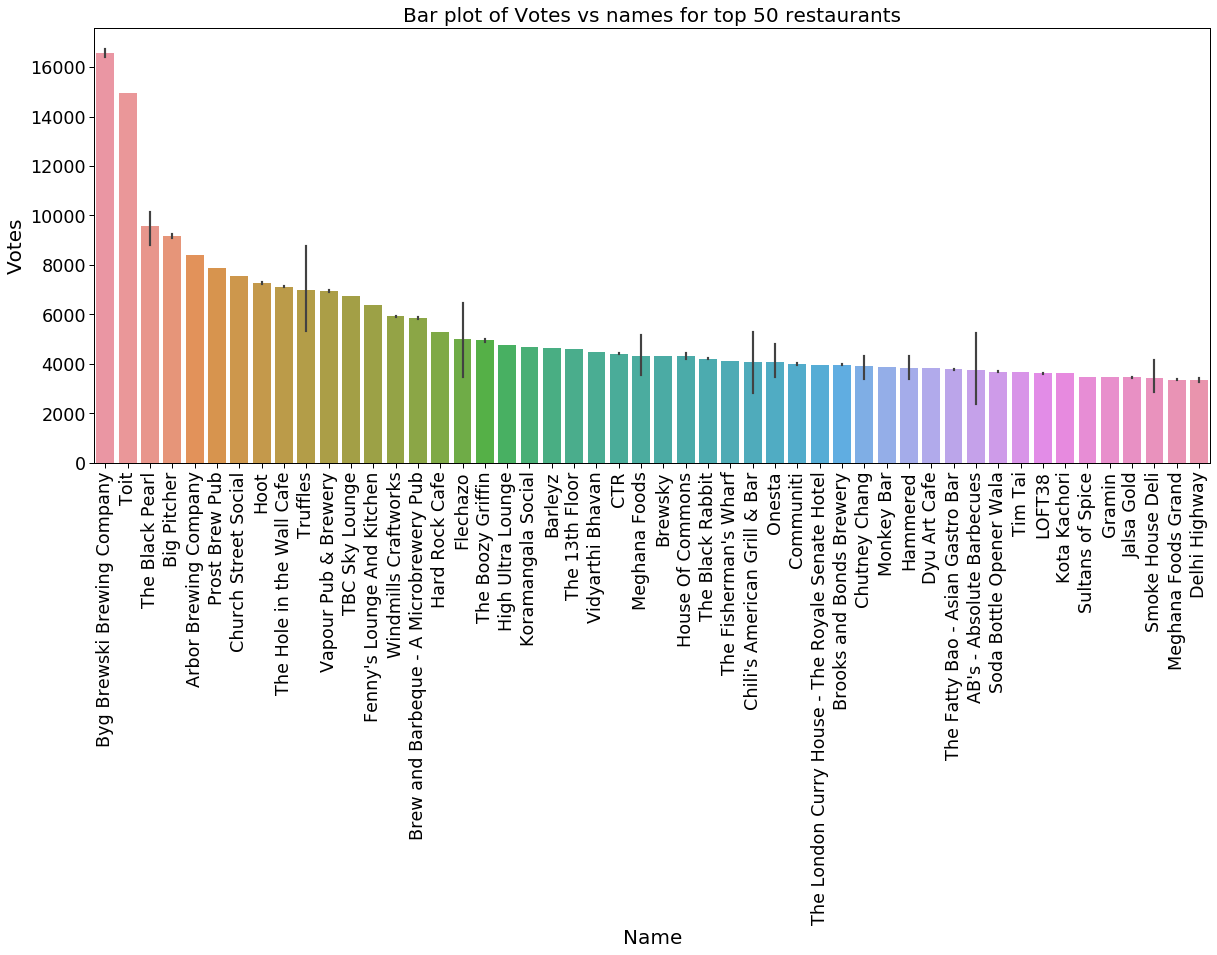

In [26]:
plt.figure(figsize=(20,8))
sns.barplot(x='Name',y='Votes',data=df,
            order=df[['Votes', 'Name']].groupby(['Name']).mean().sort_values("Votes", ascending = False).head(50).index)
plt.title('Bar plot of Votes vs names for top 50 restaurants')
plt.xticks(rotation=90)
plt.show()

In [28]:
df.loc[df['Name'] == 'Byg Brewski Brewing Company']

,Name,Online_Order,Book_table,Rate,Votes,Rest_type,Dish_liked,Cuisines,Avg_cost,Meal_type,City
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...","1,600",Delivery,Bellandur
4801,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...","1,600",Dine-out,Bellandur
4944,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...","1,600",Drinks & nightlife,Bellandur
49170,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...","1,600",Delivery,Sarjapur Road
49627,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...","1,600",Dine-out,Sarjapur Road
50059,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...","1,600",Drinks & nightlife,Sarjapur Road


C:\Users\Saiyam\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Saiyam\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Saiyam\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Saiyam\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


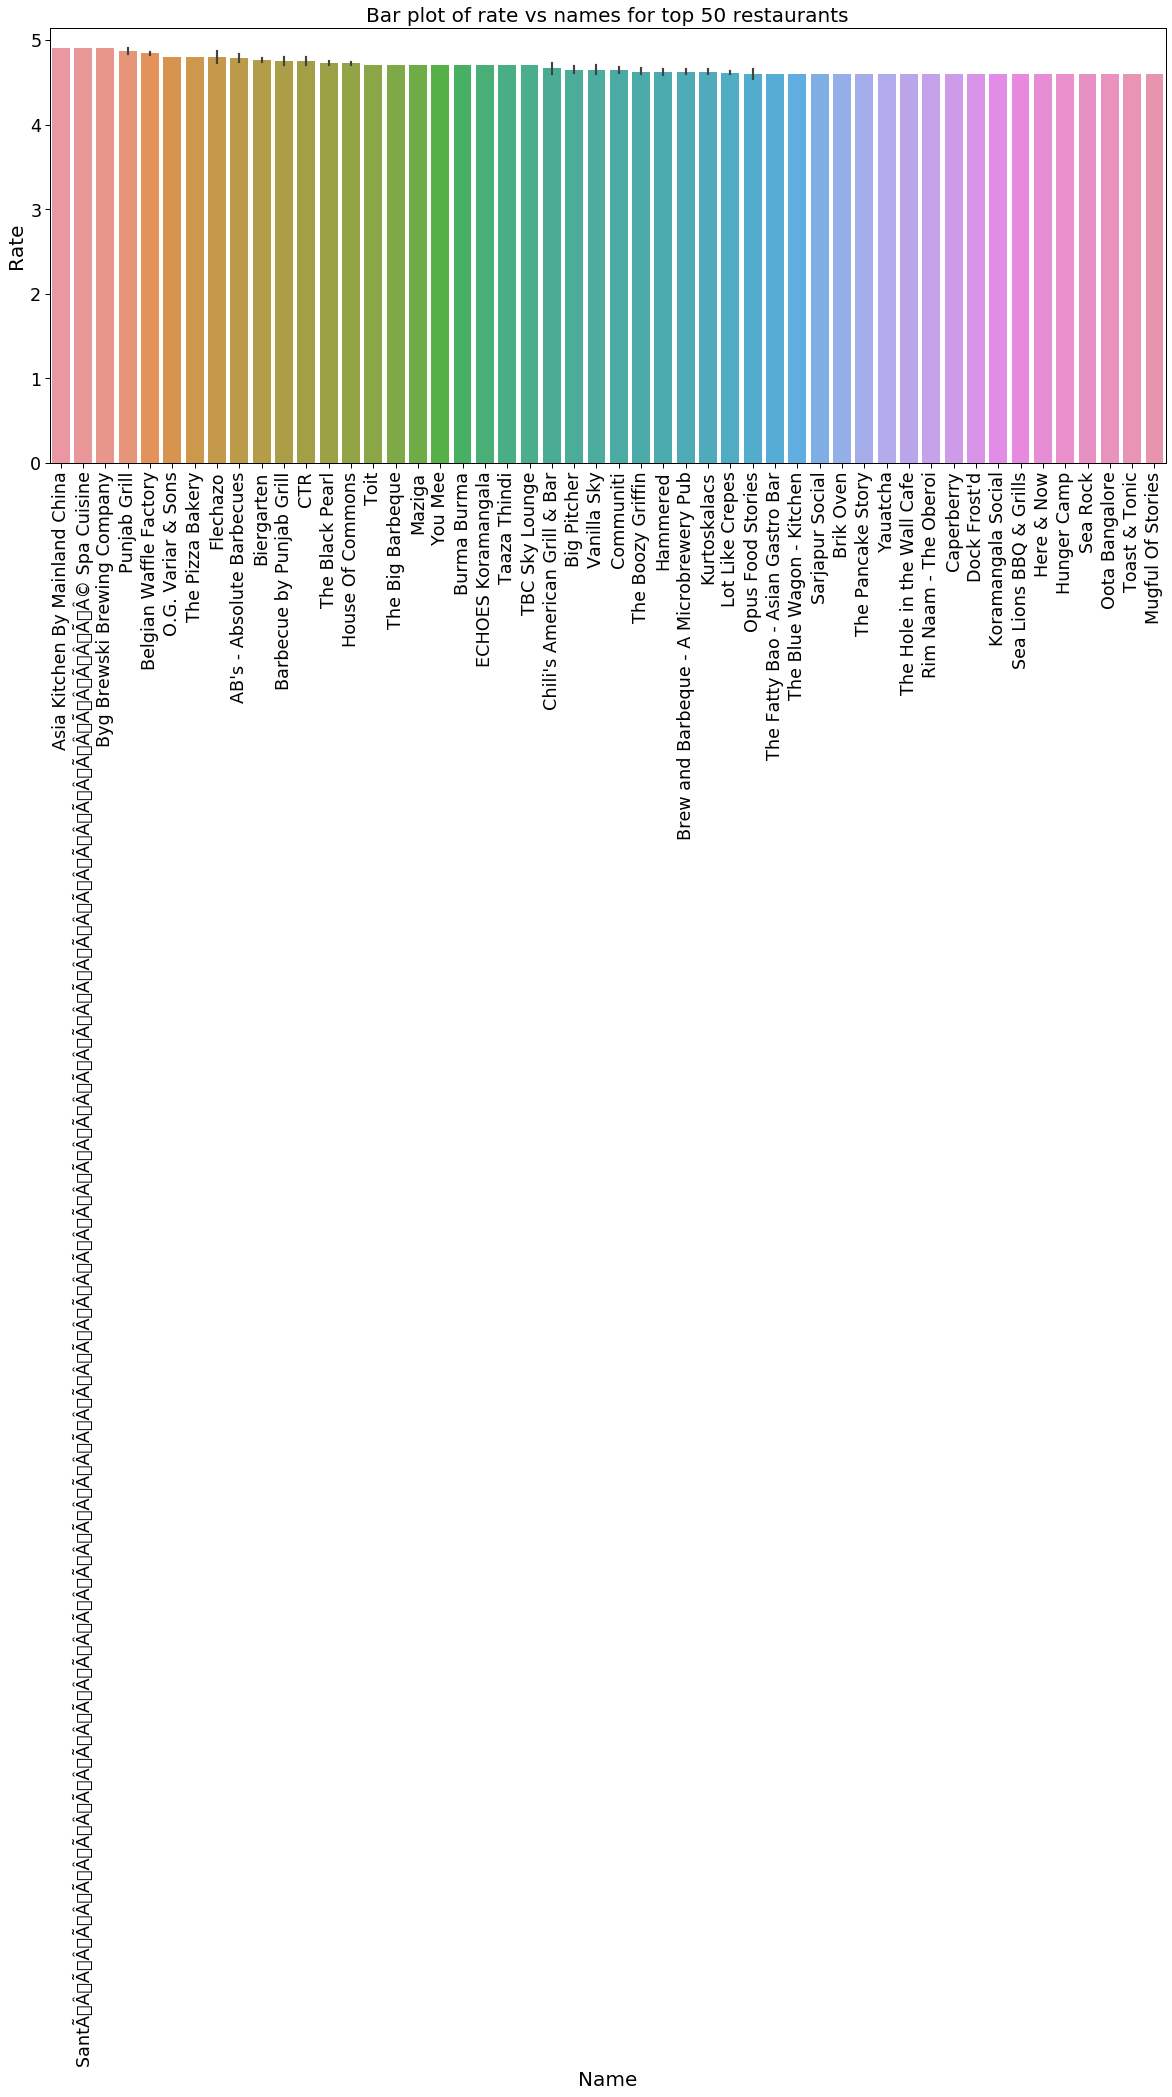

In [29]:
plt.figure(figsize=(20,8))
sns.barplot(x='Name',y='Rate',data=df,
            order=df[['Rate', 'Name']].groupby(['Name']).mean().sort_values("Rate", ascending = False).head(50).index)
plt.title('Bar plot of rate vs names for top 50 restaurants')
plt.xticks(rotation=90)
plt.show()

#### Analysis: Byg Brewski Brewing Company,Toit ,Black Pearl have the highest number of votes and the high ratings they have gained also proves the same.

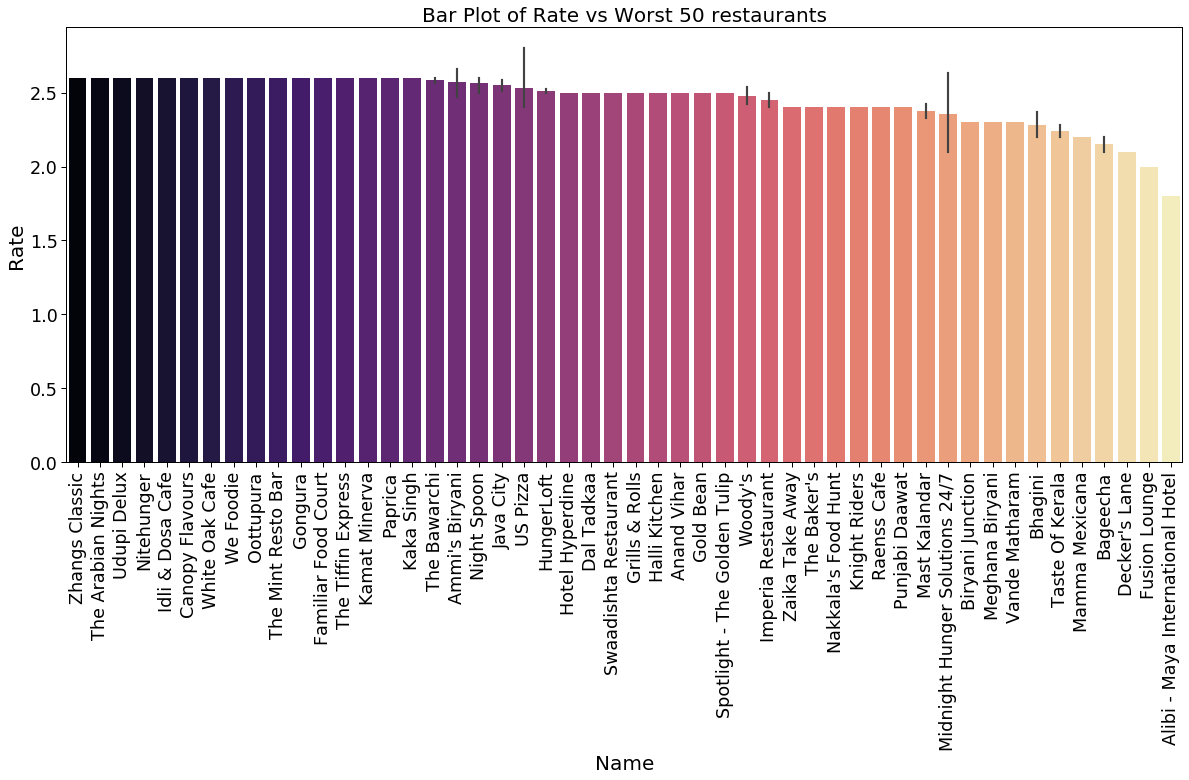

In [30]:
a = pd.DataFrame(df['Rate'])
a['Name'] = df['Name']
a = a.dropna(axis = 0, how ='any')
plt.figure(figsize=(20,8))
sns.barplot(x='Name',y='Rate',data=a,palette='magma',
            order=a[['Rate','Name']].groupby(['Name']).mean().sort_values('Rate',ascending=False).tail(50).index)
plt.title('Bar Plot of Rate vs Worst 50 restaurants')
plt.xticks(rotation=90)
plt.show()

In [31]:
df.loc[df['Name'] == 'Alibi - Maya International Hotel']

,Name,Online_Order,Book_table,Rate,Votes,Rest_type,Dish_liked,Cuisines,Avg_cost,Meal_type,City
6300,Alibi - Maya International Hotel,No,No,1.8,224,Casual Dining,Dj,"North Indian, Continental, Chinese","1,200",Dine-out,Brigade Road
12540,Alibi - Maya International Hotel,No,No,1.8,224,Casual Dining,Dj,"North Indian, Continental, Chinese","1,200",Dine-out,Church Street
38870,Alibi - Maya International Hotel,No,No,1.8,225,Casual Dining,Dj,"North Indian, Continental, Chinese","1,200",Dine-out,Lavelle Road
43489,Alibi - Maya International Hotel,No,No,1.8,225,Casual Dining,Dj,"North Indian, Continental, Chinese","1,200",Dine-out,MG Road
48390,Alibi - Maya International Hotel,No,No,1.8,225,Casual Dining,Dj,"North Indian, Continental, Chinese","1,200",Dine-out,Residency Road


In [32]:
df['Avg_cost']=df['Avg_cost'].apply(lambda x:str(x).replace(',',''))
a = list(df['Avg_cost'])
for i in range(0, len(a)):
    if a[i] != 'nan':
        a[i] = int(a[i])
    else:
        a[i] = None
df['Avg_cost'] = a

C:\Users\Saiyam\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Saiyam\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Saiyam\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Saiyam\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


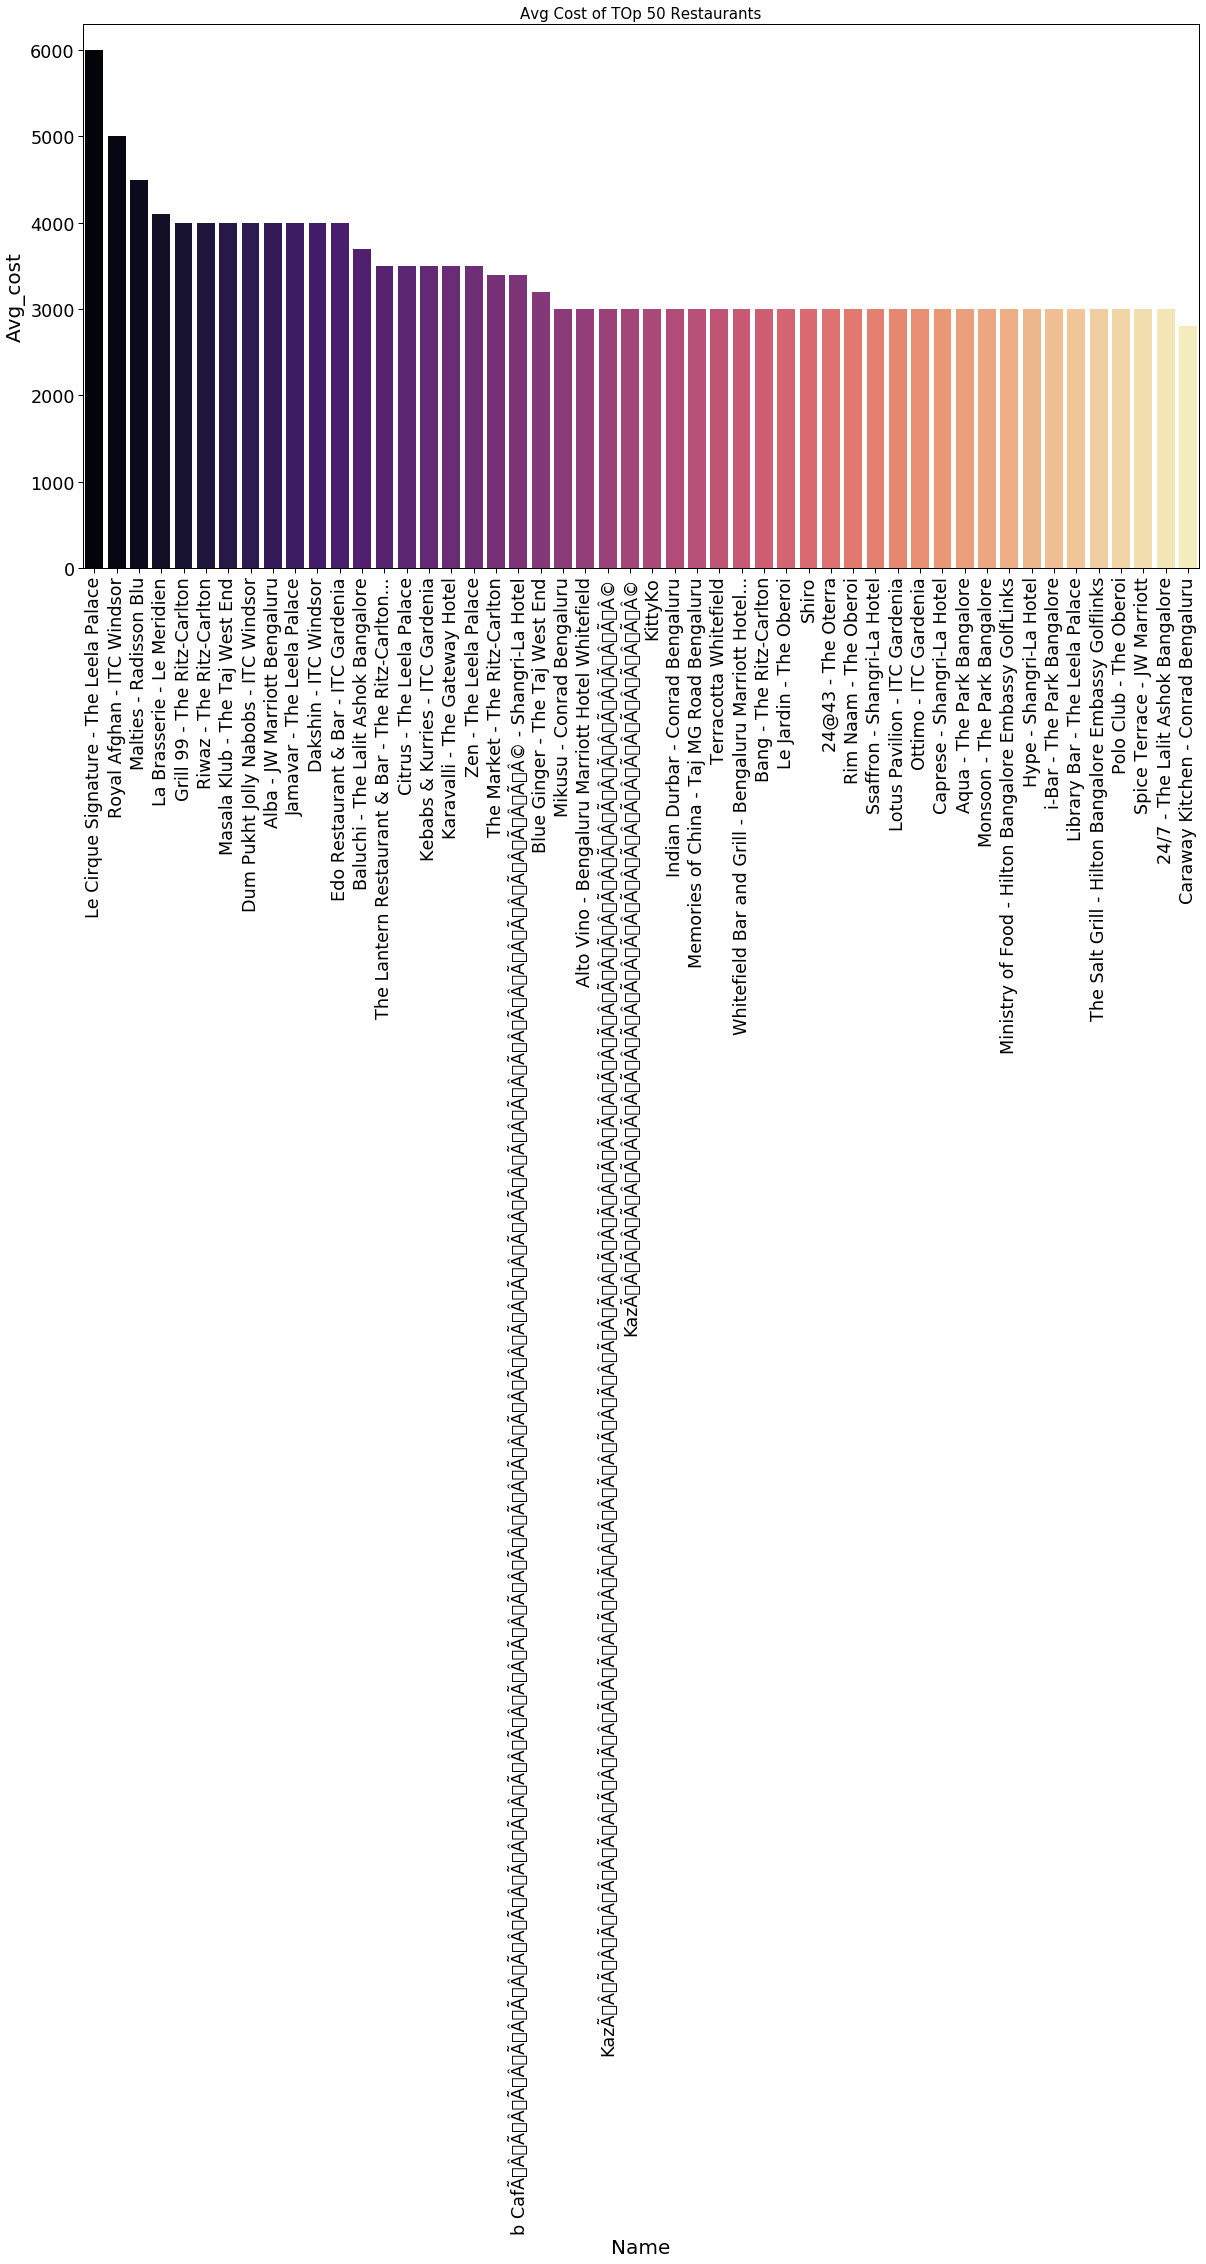

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x='Name',y='Avg_cost',data=df,palette='magma',
            order=df[['Avg_cost','Name']].groupby(['Name']).mean().sort_values(['Avg_cost'],ascending=False).head(50).index)
sns.set_context('paper',font_scale=2,rc={'fontsize':15,'axes.labelsize':15,'axes.titlesize':15})
plt.title('Avg Cost of TOp 50 Restaurants')
plt.xticks(rotation=90)
plt.show()

#### Analysis: Restaurants who have a presence all over the country with different branches have higher costs as compared to other restaurants.

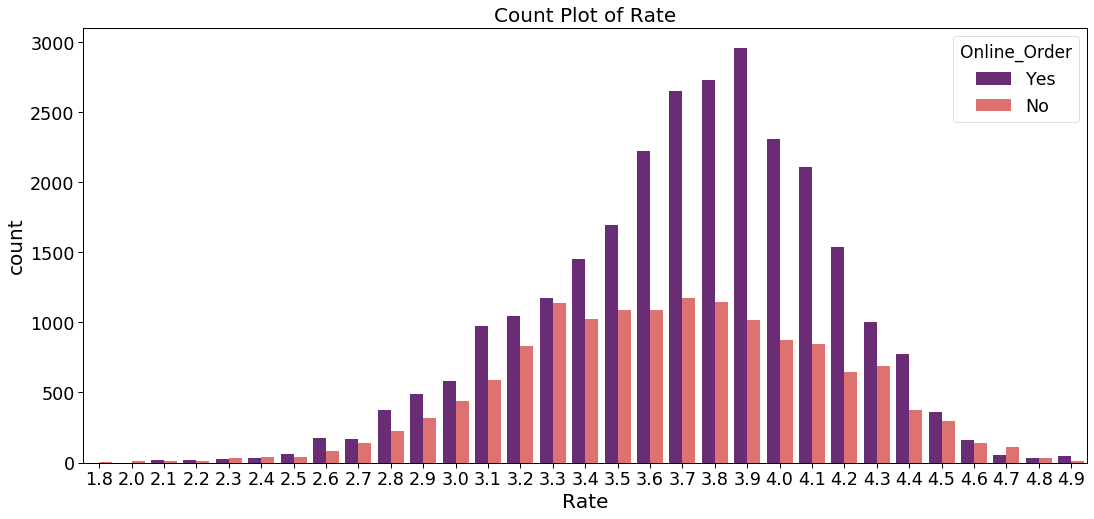

In [28]:
plt.figure(figsize=(18,8))
sns.countplot(x='Rate',data=df,hue='Online_Order',palette='magma')
plt.title('Count Plot of Rate')
plt.show()

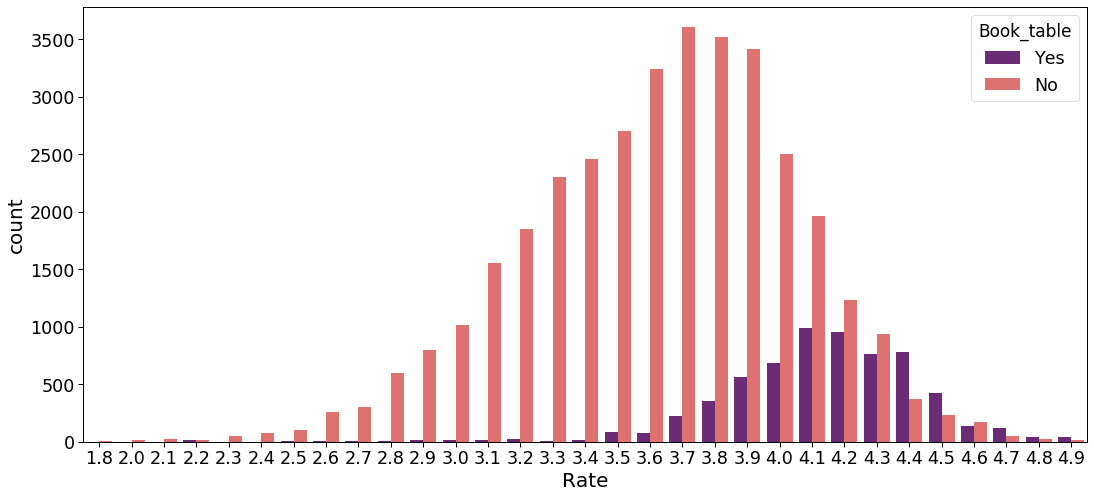

In [29]:
plt.figure(figsize=(18,8))
sns.countplot(x='Rate',data=df,hue='Book_table',palette='magma')
plt.show()

#### Analysis: Restaurants having the option of online order tend to have a better rate as compared to others. While restaurants with a rating of 3.5-4.0 allow online booking.

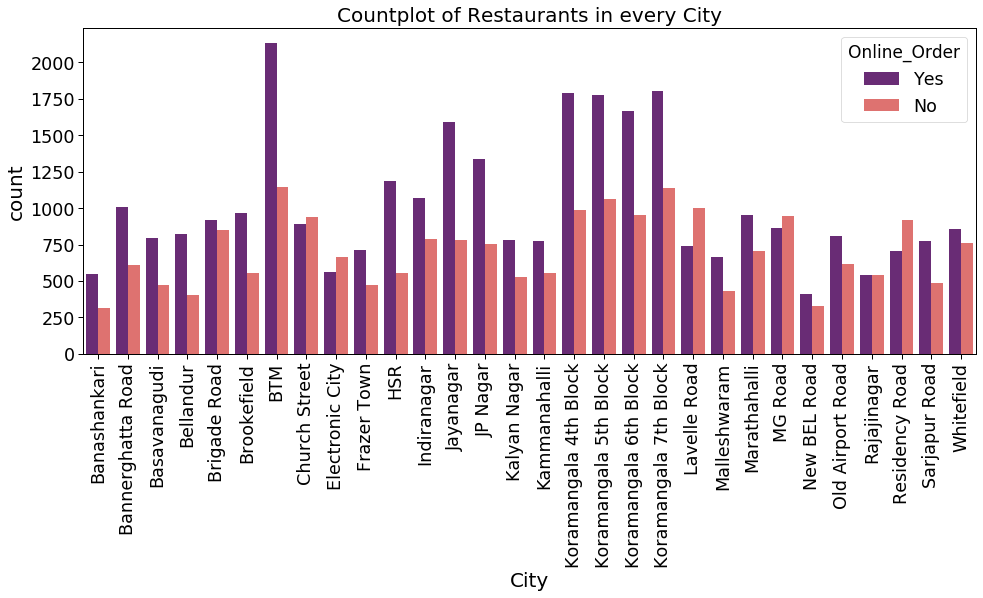

In [30]:
plt.figure(figsize=(16,6))
plt.title('Countplot of Restaurants in every City')
sns.countplot(x='City',data=df,palette='magma',hue='Online_Order')
sns.set_context('paper',font_scale=2,rc={'fontsize':15,'axes.labelsize':15,'axes.titlsize':15})
plt.xticks(rotation=90)
plt.show()

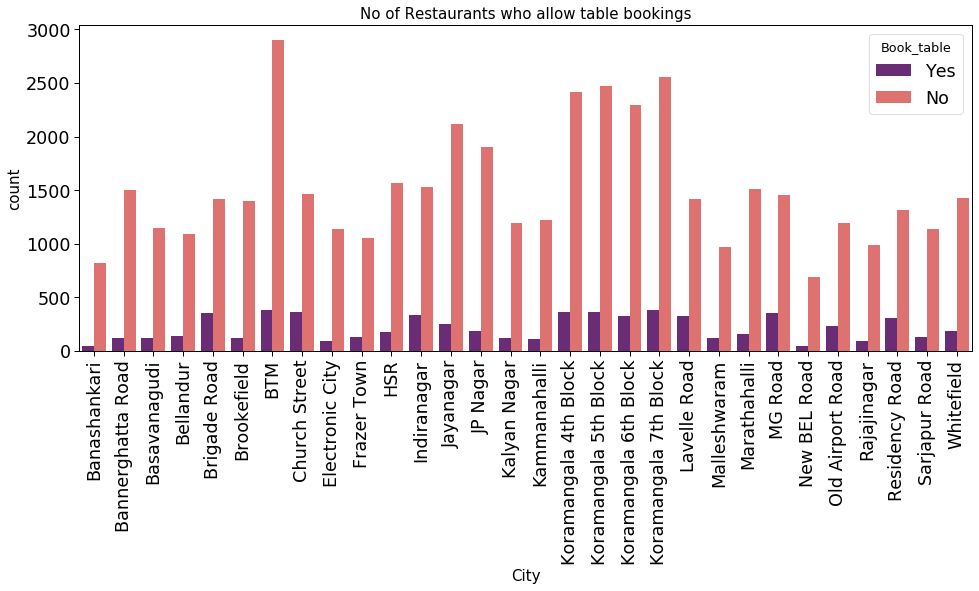

In [37]:
plt.figure(figsize=(16,6))
sns.countplot(x='City',data=df,hue='Book_table',palette='magma')
sns.set_context('paper',font_scale=2,rc={'fontsize':2,'axes.titlesize':15,'axes.labelsize':15})
plt.title('No of Restaurants who allow table bookings')
plt.xticks(rotation=90)
plt.show()

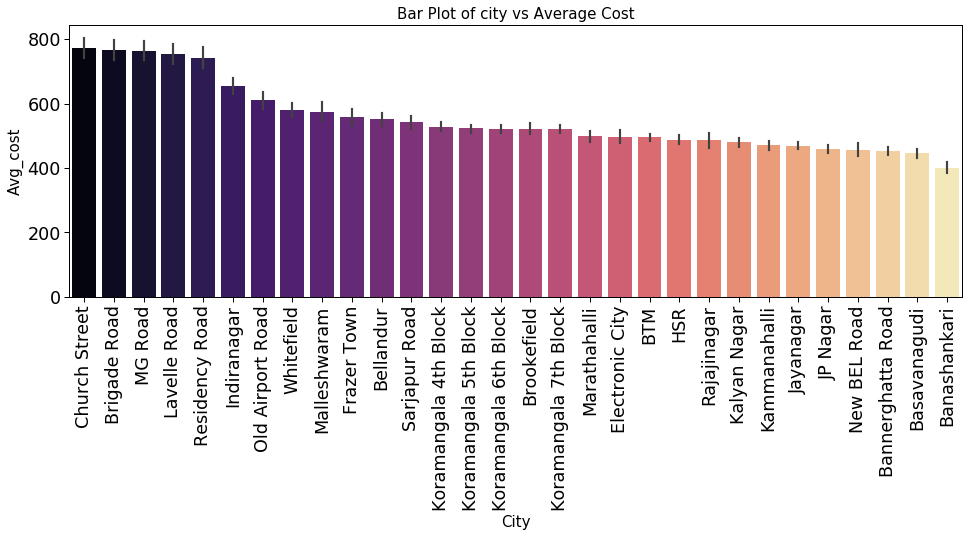

In [38]:
plt.figure(figsize=(16,5))
sns.barplot(x='City',y='Avg_cost',data=df,palette='magma',
            order=df[['Avg_cost','City']].groupby(['City']).mean().sort_values('Avg_cost',ascending=False).head(50).index)
plt.xticks(rotation=90)
plt.title('Bar Plot of city vs Average Cost')
plt.show()

#### Analysis: Places like Church Street and Brigade Road have many high end restaurants while Kormangala and Bellandur have restaurants for a middle class family. Basavanagudi and Banashankari have restaurants with a relatively low cost.

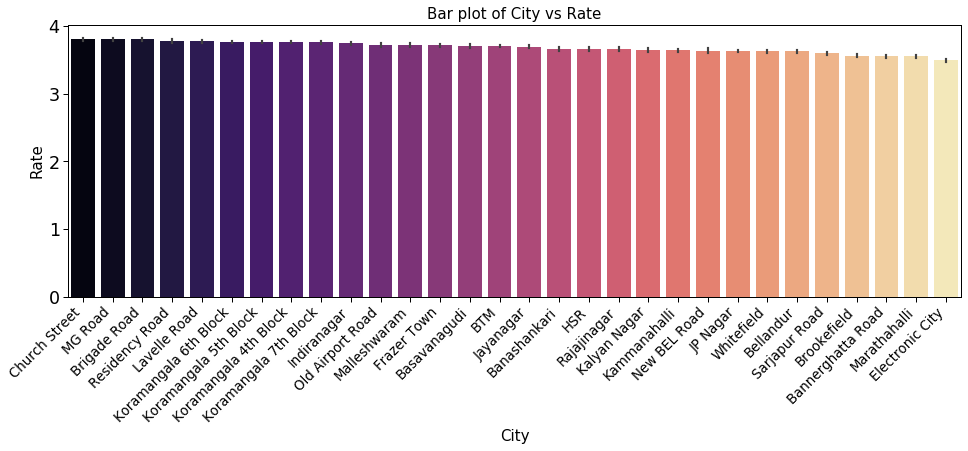

In [39]:
plt.figure(figsize=(16,5))
sns.barplot(x='City',y='Rate',data=df,palette='magma',
           order=df[['Rate','City']].groupby(['City']).mean().sort_values('Rate',ascending=False).head(50).index)
sns.set_context('paper',font_scale=2,rc={'fontsize':15,'axes.titlesize':15,'axes.labelsize':15})
plt.title('Bar plot of City vs Rate')
plt.xticks(rotation=45,horizontalalignment='right',
        fontweight='light',
        fontsize='x-small')
plt.show()

#### Analysis: High End Restaurants tend to have a higher rating then the other restaurants. 

In [43]:
a = df.iloc[:, :].values
for i in range(0, len(a)):
    if a[i, 6] == 'Friendly Staff' or a[i,6]=='Rooftop Ambience':
        a[i, 6] = None
a = pd.DataFrame(a)
a.columns = df.columns

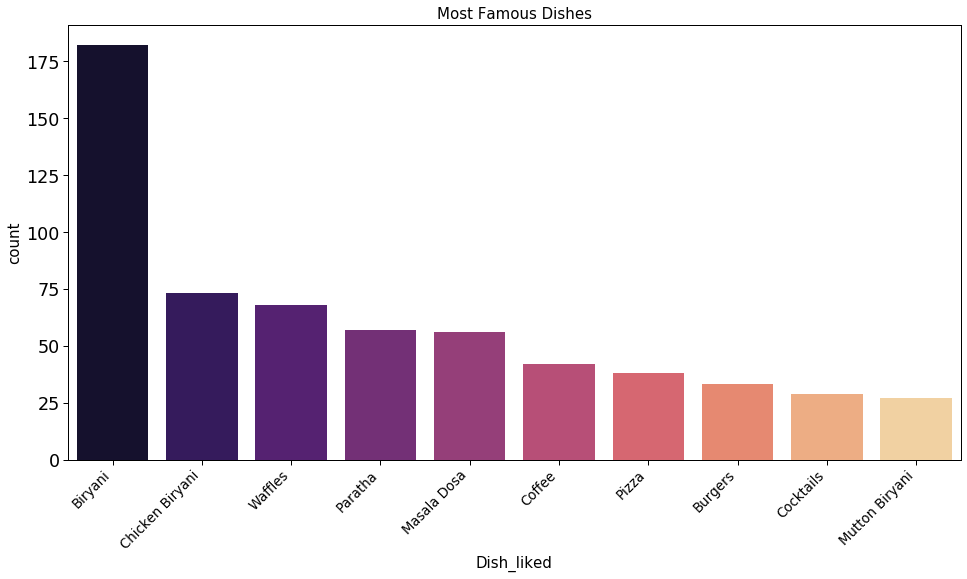

In [47]:
# plotting the top 10 dishes liked by people 
plt.figure(figsize=(16,8))
sns.countplot(x='Dish_liked',data=a,palette='magma',
           order=a['Dish_liked'].value_counts().head(10).index)
sns.set_context('paper',font_scale=2,rc={'fontsize':15,'axes.titlesize':15,'axes.labelsize':15})
plt.title('Most Famous Dishes')
plt.xticks(rotation=45,horizontalalignment='right',
        fontweight='light',
        fontsize='x-small')
plt.show()

#### Analysis: Biryani is a clear winner in terms of favourite dishes. Waffles and Parathas are other likeable food options.

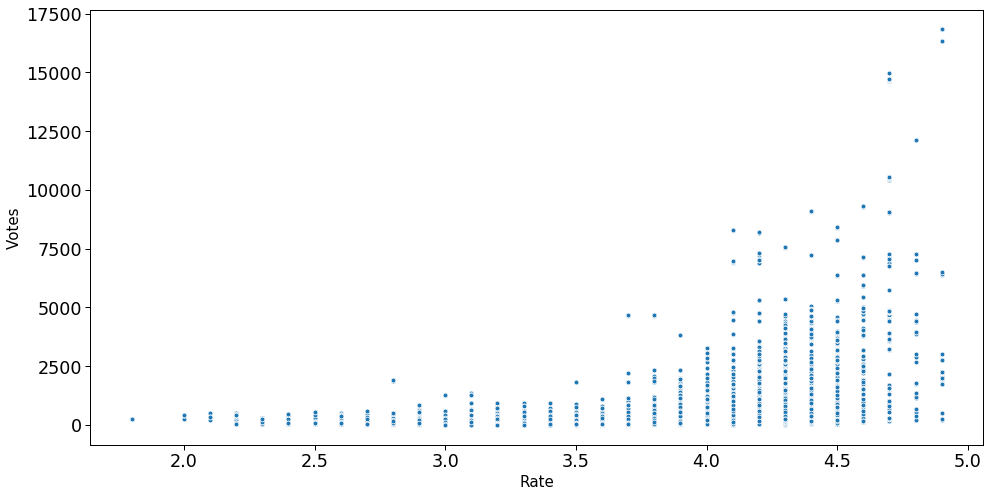

In [33]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Rate',y='Votes',data=df)
plt.show()

#### Analysis: Ratings of a restaurant tend to increase with the number of votes done by customers.

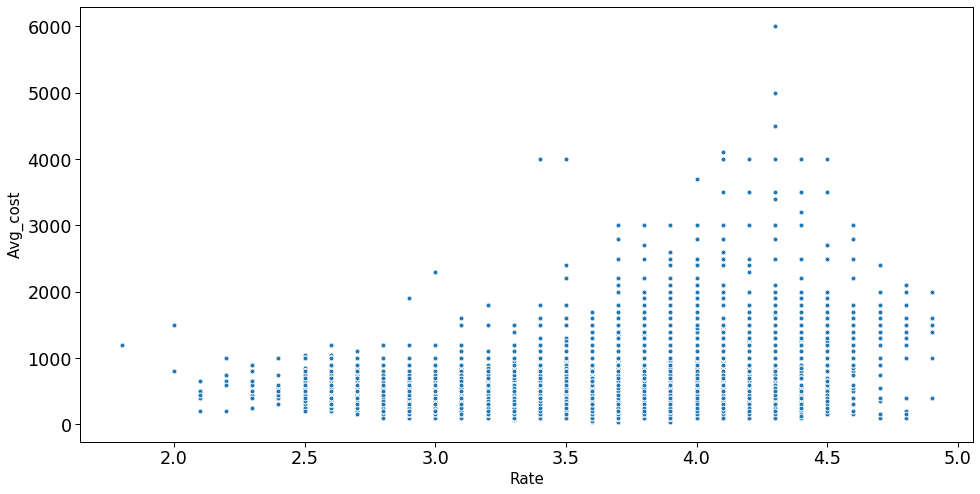

In [92]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Rate',y='Avg_cost',data=df)
plt.show()

#### Analyis: Expensive Restaurants tend to get a higher rating while mid range restaurants are also capable of pulling decent ratings.

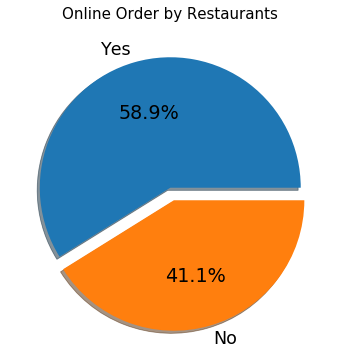

In [83]:
plt.figure(figsize=(10,6))
a=df['Online_Order'].value_counts()
plt.pie(a,explode=(0.0,0.1),labels=a.index,autopct='%1.1f%%',shadow=True)
plt.title('Online Order by Restaurants')
plt.show()

## Conclusion

### Business Insights
1. Frazer Town,Kormangala and Malleshwaram are good places to start a restaurant. 
2. Biryani and waffles are some of the most favourite cuisines.
3. Having an option of online order can boost the chance of popularity and ratings for a restaurant.
4. A place with a price if 1000 for 2 can be a viable option to start for a new restaurant.